# Q2

In [150]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [151]:
# Load the dataset
df = pd.read_csv('TaxiData.csv')

## A function for plotting graphs

In [152]:
# Helper function for basic plot formatting
def set_plot(title, xlabel, ylabel):
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.tight_layout()

## 2.a: Trip Frequency by Time of Day, Month, and Day of the Week

We will now explore the trip frequency by hour of the day, day of the week, and month. These plots help identify patterns in taxi demand during different times.

- **Hour of Day**: We'll analyze when trips are most frequent throughout the day.
- **Day of the Week**: We'll examine how trips vary across weekdays and weekends.
- **Month**: We'll explore seasonal variations in taxi usage.

### Setting up the required data for 2.a

In [153]:
# Convert trip_start_timestamp to datetime format
df['trip_start_timestamp'] = pd.to_datetime(df['trip_start_timestamp'], unit='s')

# Extract hour, day of week, and month
df['hour'] = df['trip_start_timestamp'].dt.hour
df['day_of_week'] = df['trip_start_timestamp'].dt.dayofweek  # 0=Monday, 6=Sunday
df['month'] = df['trip_start_timestamp'].dt.month

# Map day_of_week numbers to names for better readability
day_of_week_map = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
df['day_of_week_name'] = df['day_of_week'].map(day_of_week_map)

# Reorder days of the week to start from Sunday
ordered_days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df['day_of_week_name'] = pd.Categorical(df['day_of_week_name'], categories=ordered_days, ordered=True)


```
We start by analyzing trip frequencies by the hour of the day. The time of day plays a significant role in understanding peak demand periods. This helps in identifying rush hours, which can inform decisions on fleet management, staffing, or demand forecasting.
```

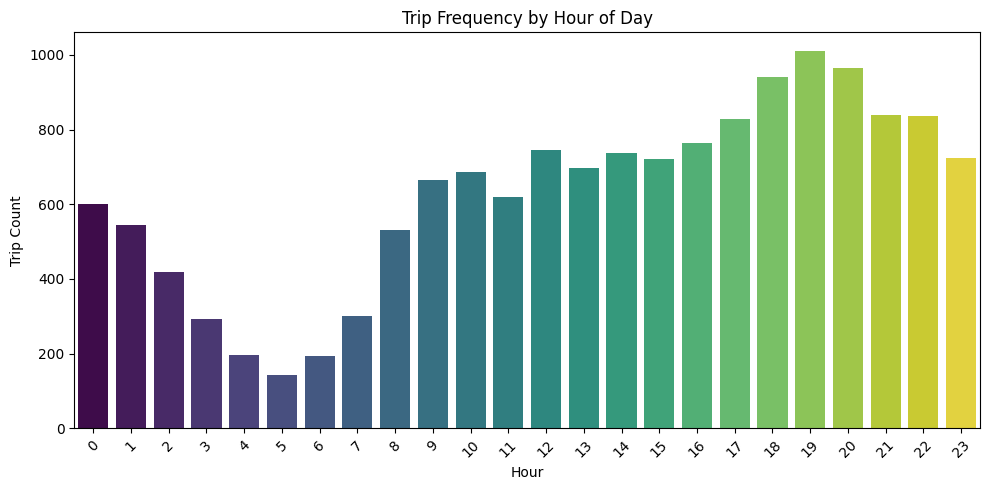

In [154]:
# Hours of the Day (Bar chart with palette)
plt.figure(figsize=(10, 5))
sns.countplot(x='hour', data=df, hue='hour', palette='viridis', dodge=False, legend=False)
set_plot('Trip Frequency by Hour of Day', 'Hour', 'Trip Count')
plt.savefig('Hours of the Day.png')
plt.show()

**Summary**: The bar chart illustrates the variation in trip frequencies throughout the day. Notably, there are peak hours around 18:00 to 20:00, indicating a high demand for taxi services during these times. Conversely, trip frequencies drop significantly between 04:00 and 05:00, showing minimal demand during these early morning hours. These patterns are crucial for managing taxi availability and optimizing resource allocation to meet peak demand while maintaining efficiency during low-demand periods.

```
Next, we explore the trip frequency by day of the week. We expect different patterns during weekdays and weekends. Weekdays might reflect commuting behavior, while weekends could see more leisure travel.
```

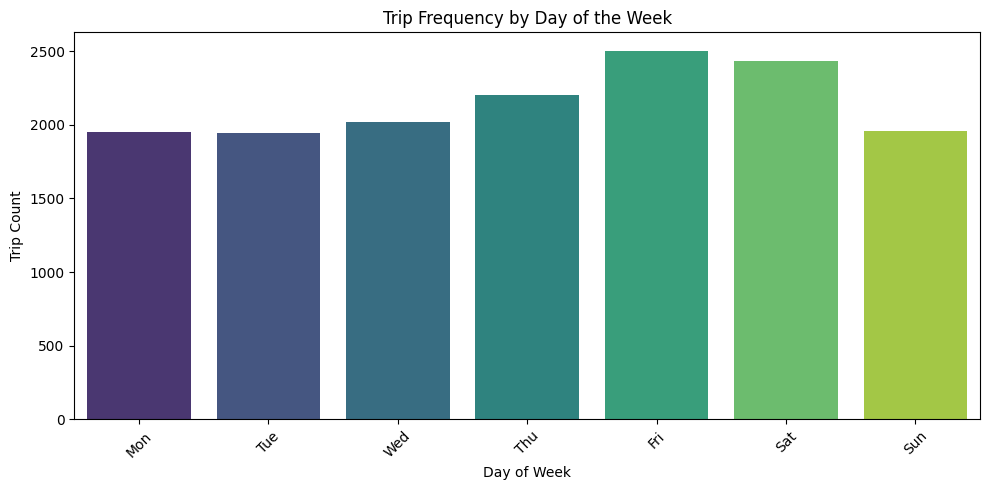

In [155]:
# Days of the Week (Bar chart with reordered days and palette)
plt.figure(figsize=(10, 5))
sns.countplot(x='day_of_week_name', data=df, hue='day_of_week_name', palette='viridis', dodge=False, legend=False)
set_plot('Trip Frequency by Day of the Week', 'Day of Week', 'Trip Count')
plt.savefig('Days of the Week.png')
plt.show()

**Summary**:
The bar chart illustrates the variation in trip frequencies throughout the week. Notably, Friday has the highest trip count, indicating a peak in demand as the week comes to an end. This is closely followed by Saturday, suggesting a high usage of taxi services over the weekend. In contrast, Sunday has the lowest trip count, indicating reduced demand. These insights are crucial for understanding how trip frequencies change throughout the week and can inform strategies for managing taxi availability, especially on high-demand days like Fridays and Saturdays.


```
Here, we analyze trip frequency by month. Seasonal patterns can emerge, revealing how factors such as holidays, weather, or events influence taxi usage. 
```

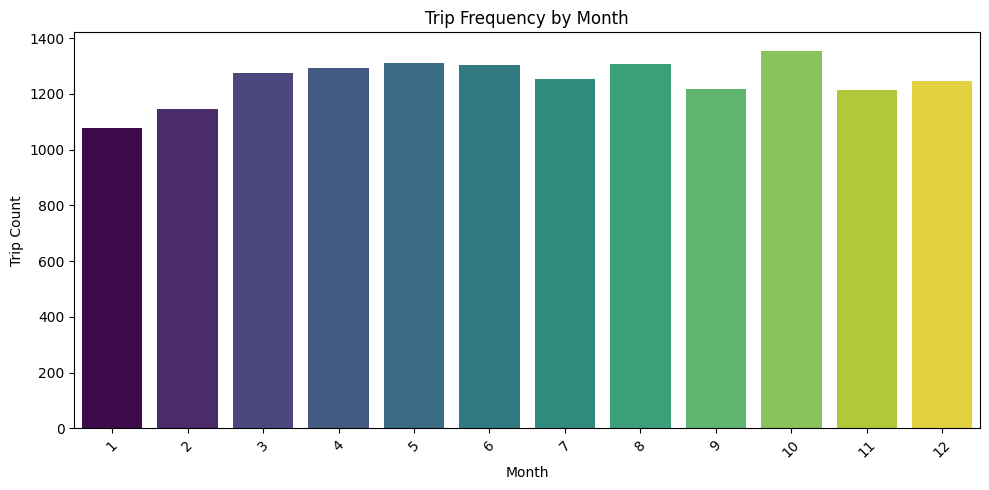

In [156]:
# Months of the Year (Bar chart with palette)
plt.figure(figsize=(10, 5))
sns.countplot(x='month', data=df, hue='month', palette='viridis', dodge=False, legend=False)
set_plot('Trip Frequency by Month', 'Month', 'Trip Count')
plt.savefig('Months of the Year.png')
plt.show()

**Summary**:
The bar chart illustrates the variation in trip frequencies throughout the year. Notably, October sees the highest trip count, indicating a peak in demand during this month. In contrast, January has the lowest trip count, suggesting reduced demand. The variation in trip frequencies across the months highlights seasonal trends, which are crucial for planning resources and managing taxi availability during different times of the year. Identifying these patterns can help in optimizing operations during high-demand periods and ensuring efficient service throughout the year.

## 2.b: Peak Hours and Distance Analysis

Next, we will focus on analyzing peak hours of taxi usage and the distribution of trip distances during these peak times.

- **Peak Hour Analysis**: We'll visualize the peak hours using a heatmap.
- **Distance Distribution During Peak Hours**: We will also examine the distribution of trip distances during peak hours.


```
In this section, we focus on peak hours. The heatmap visualizes the frequency of trips by hour of the day. This helps us understand the overall demand at specific hours.
```

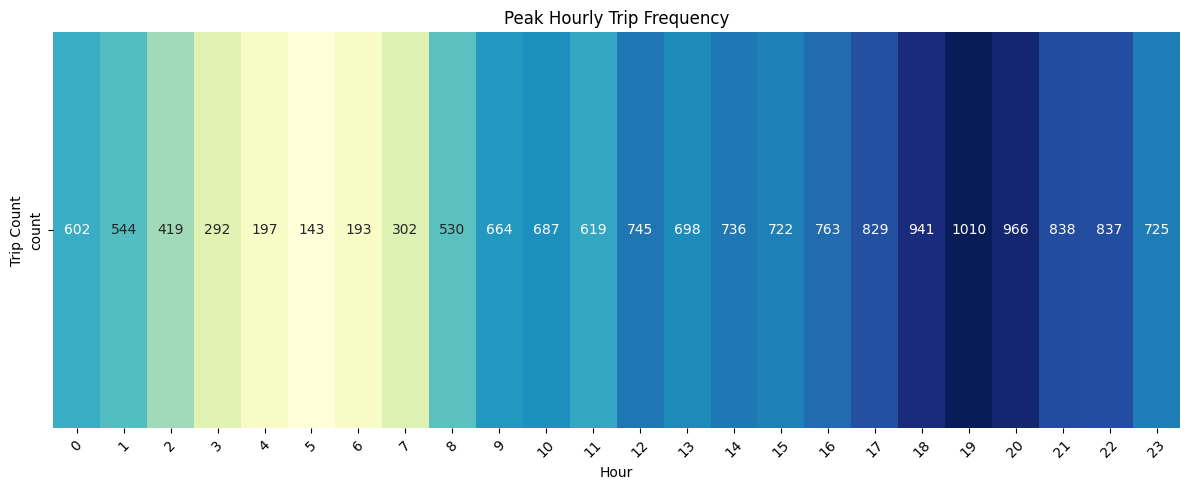

In [157]:
# Heatmap for Peak Hours (Hour vs. Trip Count)
hourly_trip_counts = df['hour'].value_counts().sort_index()

plt.figure(figsize=(12, 5))
sns.heatmap(hourly_trip_counts.to_frame().T, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
set_plot('Peak Hourly Trip Frequency', 'Hour', 'Trip Count')
plt.savefig('Heatmap for Peak Hours.png')
plt.show()

**Summary**: The heatmap indicates the variation in trip frequencies throughout the day. Peak hours are observed between 18:00 to 20:00 in the evening, corresponding to typical commuting times. These peak periods show high demand for taxi services, requiring efficient management of taxi availability to meet increased demand. Conversely, there is a noticeable dip in trips during early morning hours, from 02:00 to 04:00, indicating lower demand. Understanding these patterns helps optimize taxi service operations and reduce wait times during high-demand periods.

```
We further analyze trip distance during peak hours. This can help us understand whether shorter trips or longer trips dominate during rush hours. 
```

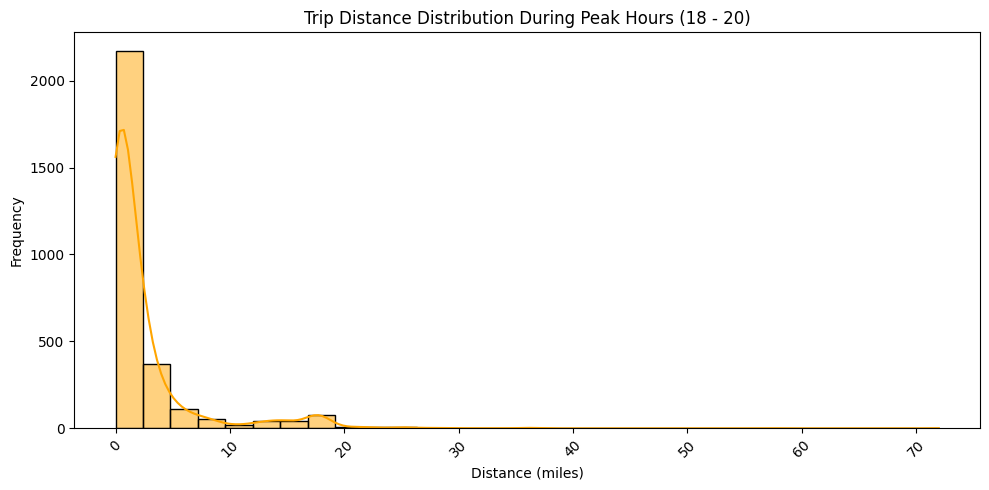

In [158]:
# Distance Analysis (Distribution of Trip Distances during Peak Hours)
peak_hours = [18, 19, 20]
peak_hour_data = df[df['hour'].isin(peak_hours)]

plt.figure(figsize=(10, 5))
sns.histplot(peak_hour_data['trip_miles'], bins=30, kde=True, color='orange')
set_plot('Trip Distance Distribution During Peak Hours (18 - 20)', 'Distance (miles)', 'Frequency')
plt.savefig('Distance Analysis.png')
plt.show()

The histogram provides insights into the distribution of trip distances during peak hours. Key observations include:
- **Shorter Trips:** A significant portion of trips may be shorter, possibly reflecting the demand for local rides during peak hours.
- **Longer Trips:** On the other hand, there might be a few longer trips, possibly due to passengers traveling to less accessible areas or taking longer routes due to congestion.

This information helps taxi operators prepare for varying trip lengths, adjust vehicle allocation, and optimize routes to maintain service efficiency during peak times.

## 2.c: Trip Duration and Distance Distribution

Here we will analyze the distribution of trip duration and trip distances. These plots help us understand how long trips typically last and how far they usually go.

- **Trip Duration Distribution**: We will look at the frequency of trip durations.
- **Trip Distance Distribution**: We'll explore how the distance of trips is distributed.


```
Here, we analyze the distribution of trip durations. By understanding the duration, we can infer the typical trip length and assess any outliers or long-duration trips.
```

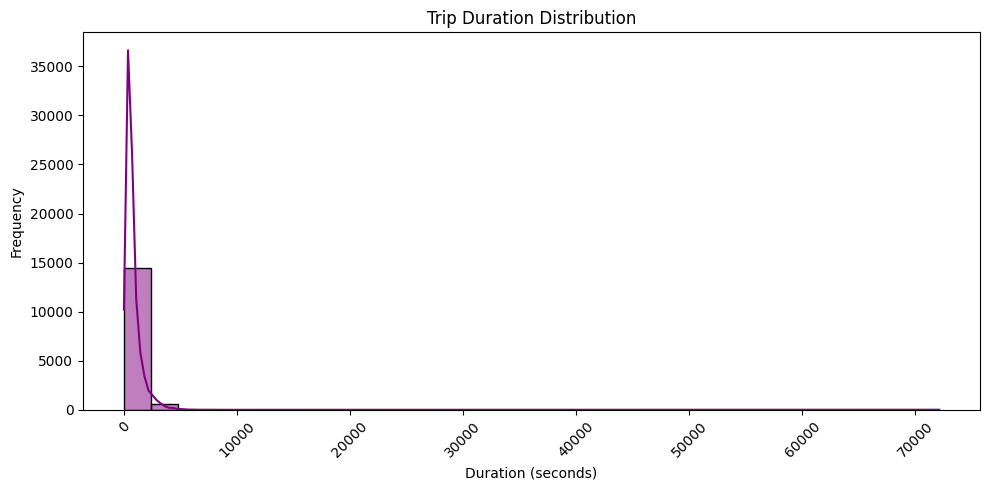

In [159]:
# Trip Duration Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['trip_seconds'], bins=30, kde=True, color='purple')
set_plot('Trip Duration Distribution', 'Duration (seconds)', 'Frequency')
plt.savefig('Trip Duration Distribution.png')
plt.show()

The histogram of trip duration shows the distribution of how long taxi trips typically take. Key insights:
- **Short Trips are Common:** The majority of trips likely have shorter durations, suggesting that most passengers take brief local rides.
- **Tail of Longer Trips:** There may be a small proportion of longer trips, which could be outliers or longer rides due to traffic, geographical factors, or passenger preferences.

This distribution helps taxi operators plan better for high-demand areas by accounting for how long rides typically take and adjusting vehicle availability accordingly.

```
Next, we examine the distribution of trip distances. This is similar to duration, but with a focus on distance rather than time. The distribution helps identify patterns like short local trips or longer journeys.
```

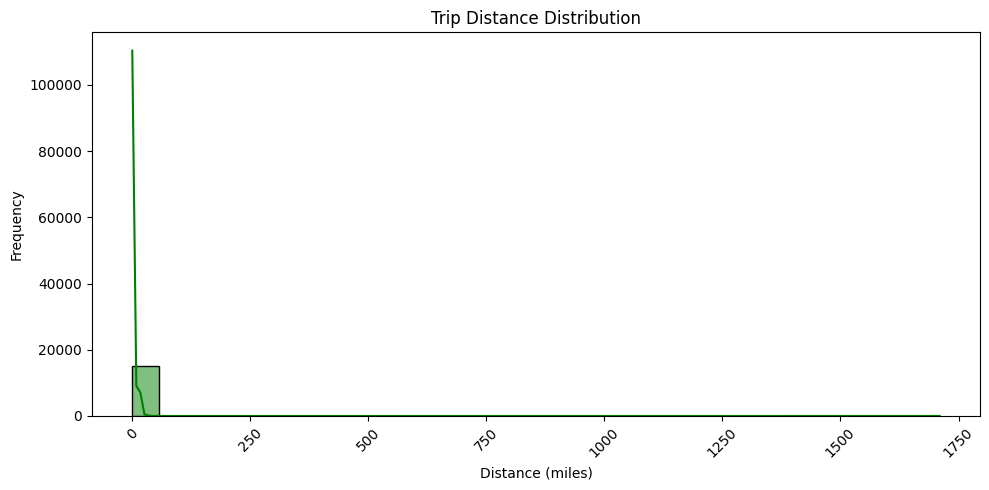

In [160]:
# Trip Distance Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['trip_miles'], bins=30, kde=True, color='green')
set_plot('Trip Distance Distribution', 'Distance (miles)', 'Frequency')
plt.savefig('Trip Distance Distribution.png')
plt.show()

The histogram of trip distances provides valuable information about the range of distances covered by taxis. Key observations include:
- **Shorter Distances are More Frequent:** Similar to the trip duration distribution, most trips likely involve relatively short distances.
- **Occasional Long Trips:** There may be a few longer trips, reflecting passengers traveling across greater distances, potentially due to special events, airport rides, or trips to outlying areas.

This analysis helps in understanding the overall distance coverage and adjusting fleet deployment, especially during peak demand hours.

```
In this section, we look at the relationship between trip duration and trip distance. We expect a positive correlation where longer trips tend to take more time.
```

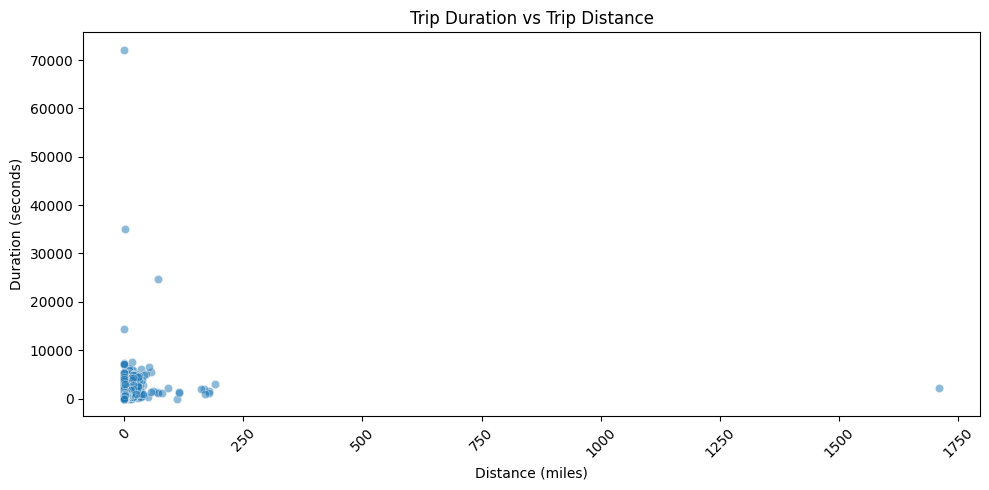

In [161]:
# Correlation Analysis (Scatter plot for Trip Duration vs Trip Distance)
plt.figure(figsize=(10, 5))
sns.scatterplot(x='trip_miles', y='trip_seconds', data=df, alpha=0.5)
set_plot('Trip Duration vs Trip Distance', 'Distance (miles)', 'Duration (seconds)')
plt.savefig('Correlation Analysis.png')
plt.show()

Here we will analyze the relationship between trip duration and trip distance using a scatter plot. 
- **Summary**: The scatter plot illustrates the relationship between trip distance and duration. Key observations include: - 
- **Positive Correlation:** Generally, longer trips tend to have longer durations, which is expected as more distant trips naturally take more time to complete. - 
- **Outliers:** There are some outliers where short trips take a long time (possibly due to traffic or detours) and long trips are completed quickly (possibly due to clear roads or fast routes). These insights are valuable for route planning, as they show how the length of the trip affects the time needed. Taxi operators can use this information to improve efficiency by factoring in traffic conditions, optimizing routes, and better predicting passenger wait times. Understanding this correlation helps in better resource allocation and improving overall service efficiency for both short and long trips.

## 2.d: Seasonal Trends in Taxi Usage and Distance

In this section, we will analyze how taxi usage (trip count) and trip distances vary by month. This can help us understand if there are seasonal fluctuations in demand or travel behavior, which could be crucial for resource allocation and demand forecasting.


```
This part investigates seasonal trends by analyzing monthly trip counts. Seasonal fluctuations in taxi usage can inform decisions on fleet management, promotions, and marketing.
```

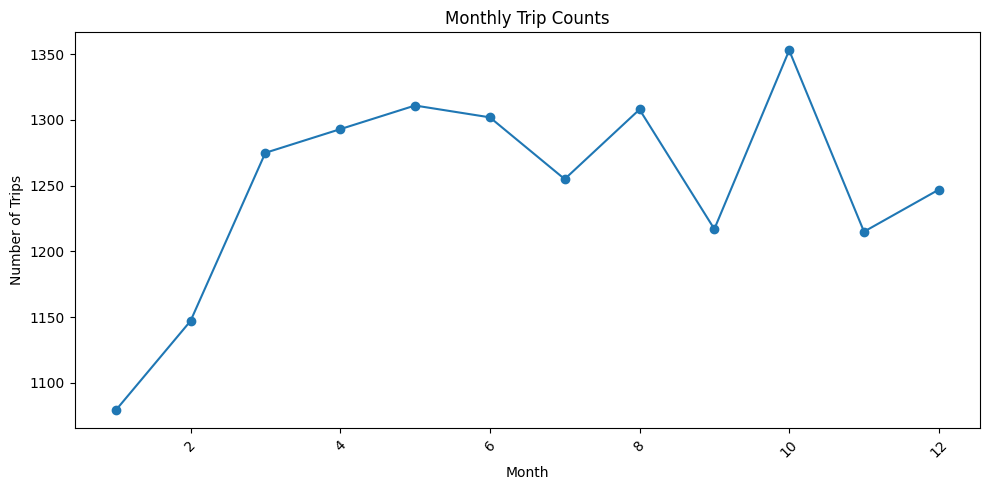

In [162]:
# Monthly trip count
monthly_trips = df.groupby('month').size()

plt.figure(figsize=(10, 5))
monthly_trips.plot(kind='line', marker='o')
set_plot('Monthly Trip Counts', 'Month', 'Number of Trips')
plt.savefig('Monthly trip count.png')
plt.show()

**Summary**:
The line graph shows the monthly variation in the number of trips taken throughout the year. Key observations include:
- **Seasonal Peaks:** There is a noticeable peak in October, with the highest number of trips taken during this month. This suggests an increased demand for taxi services in the fall.
- **Seasonal Lows:** The number of trips is at its lowest in January, indicating reduced demand during the winter months.
- **Fluctuations:** There are fluctuations in trip counts during the summer months, but overall, there is a steady increase in trip counts from January to October before dropping again.

These insights are crucial for understanding seasonal patterns in taxi usage, which can help in resource allocation and service planning to meet varying demand levels throughout the year.

```
In this section, we analyze the average trip distance by month. This helps to understand whether people tend to take longer or shorter trips during specific months.
```

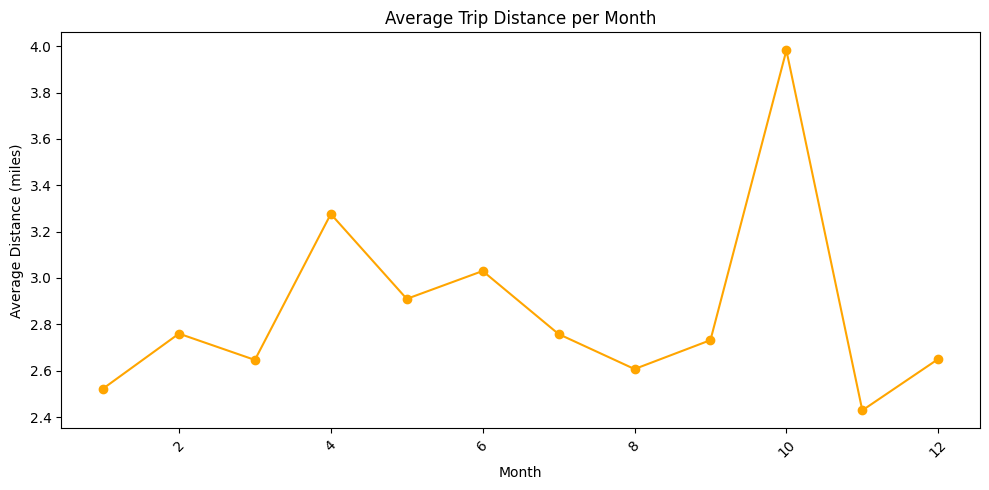

In [163]:
# Average trip distance per month
monthly_avg_distance = df.groupby('month')['trip_miles'].mean()

plt.figure(figsize=(10, 5))
monthly_avg_distance.plot(kind='line', color='orange', marker='o')
set_plot('Average Trip Distance per Month', 'Month', 'Average Distance (miles)')
plt.savefig('Average trip distance per month.png')
plt.show()

**Summary**:
The line graph shows the average trip distance per month, highlighting seasonal fluctuations in trip lengths. Key observations include:
- **Peak in October:** There is a notable peak in October, where the average trip distance reaches its highest point at approximately 4.0 miles. This suggests that trips tend to be longer during this month.
- **Drop in November:** Following the peak, there is a significant drop in November, with the average trip distance falling to around 2.4 miles. This indicates shorter trips during this month.
- **Fluctuations:** Other months show smaller peaks and troughs, indicating varying trip distances throughout the year.

Understanding these seasonal trends in trip distances can help in resource allocation and service planning, ensuring that taxi operators are prepared to meet the changing demands and optimize their operations based on trip length variations throughout the year.

## 2.e: Distance vs. Time of Day

In this section, we explore how the average trip distance varies by hour of the day. This analysis can help in understanding if there are specific times during the day when trips tend to be longer or shorter.


```
This section explores how trip distances vary across different hours of the day. Understanding these variations helps in identifying when trips tend to be longer or shorter during the day.
```

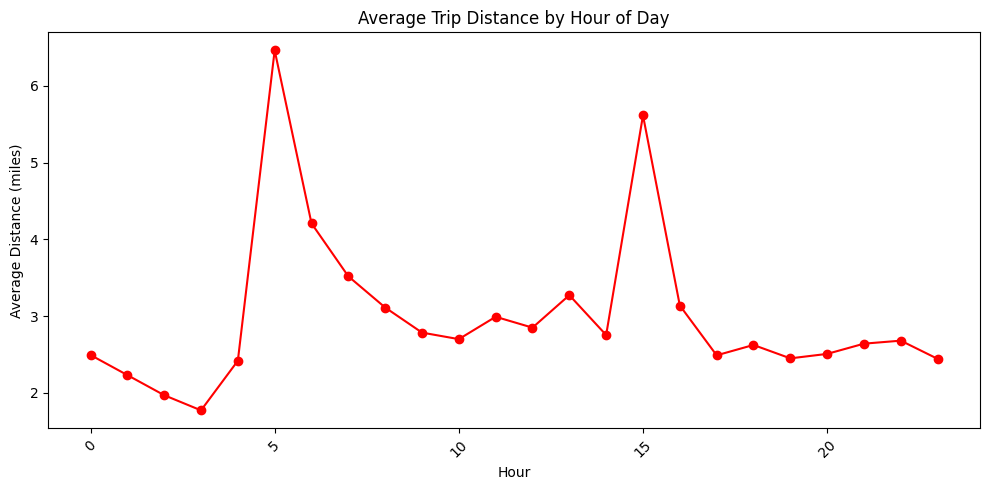

In [164]:
# Average distance per hour
hourly_avg_distance = df.groupby('hour')['trip_miles'].mean()

plt.figure(figsize=(10, 5))
hourly_avg_distance.plot(kind='line', color='red', marker='o')
set_plot('Average Trip Distance by Hour of Day', 'Hour', 'Average Distance (miles)')
plt.savefig('Average distance per hour.png')
plt.show()

**Summary**:
The line graph shows the average trip distance by hour of the day. Key observations include:
- **Early Morning Peak:** There is a significant peak around 5 AM, where the average trip distance exceeds 6 miles. This suggests that trips tend to be longer during the early morning hours.
- **Mid-Afternoon Peak:** Another peak occurs around 3 PM, with the average trip distance slightly above 4 miles. This indicates a trend of longer trips in the mid-afternoon.
- **General Trends:** Most other hours show relatively lower average distances, typically between 2 and 4 miles, indicating shorter trips during the rest of the day.

Understanding these patterns helps taxi operators manage their fleet more efficiently by anticipating longer trips during certain times of the day and optimizing resource allocation to meet varying demand levels.